In [1]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('mtbs_fod_pts_20170501.csv')

In [3]:
x = df1.groupby('STATE')
cal = x.get_group('California')
y = cal.groupby('Fire_Type')
year_data = pd.concat([y.get_group('WF'), y.get_group('WFU')])

In [4]:
loc_data = pd.concat([year_data['FIRE_YEAR'],year_data['LAT'],year_data['LONG']], axis=1)
print(loc_data)

      FIRE_YEAR     LAT     LONG
26       1994.0  32.604 -116.925
27       1984.0  32.682 -116.886
28       1992.0  32.749 -116.310
29       1986.0  33.423 -117.483
30       2003.0  33.638 -116.967
31       1996.0  33.890 -117.147
32       1998.0  33.896 -116.995
33       1986.0  33.899 -117.146
34       1997.0  33.899 -117.151
35       1985.0  33.919 -117.784
36       1997.0  33.937 -117.071
37       1996.0  33.961 -117.201
38       1990.0  33.967 -117.789
39       1993.0  33.976 -117.293
40       1998.0  33.982 -117.022
41       1986.0  34.260 -117.890
42       2008.0  34.309 -118.382
43       1986.0  34.312 -119.058
44       2009.0  34.327 -118.136
47       2001.0  34.493 -118.495
48       2001.0  34.502 -118.650
49       2002.0  34.539 -118.436
50       1999.0  34.552 -118.186
51       2002.0  34.558 -118.482
52       2002.0  34.585 -118.275
53       1986.0  34.629 -118.302
54       1986.0  34.634 -119.892
55       1997.0  34.634 -120.330
56       2002.0  34.740 -118.781
57       2

C:\Users\ashray.bhandare\Anaconda3\envs\NLTP_env\lib\site-packages\mpl_toolkits\basemap\__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\ashray.bhandare\Anaconda3\envs\NLTP_env\lib\site-packages\mpl_toolkits\basemap\__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


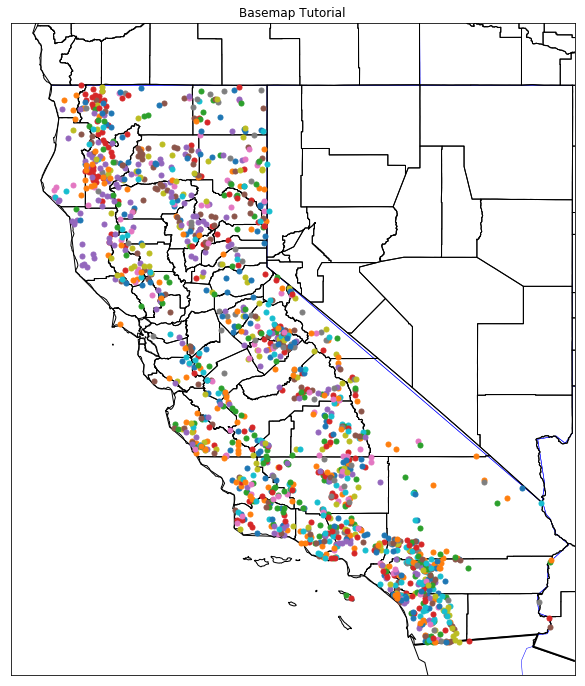

In [5]:
plt.figure(figsize=(24,12))
m = Basemap(projection='mill',
            llcrnrlat = 32,
            llcrnrlon = -125,
            urcrnrlat = 43,
            urcrnrlon = -114,
            resolution='l')

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')
m.drawcounties(linewidth = 1)

for i in range(1984,2016):
    LAlat, LAlon = loc_data.groupby('FIRE_YEAR').get_group(i)['LAT'].as_matrix(), loc_data.groupby('FIRE_YEAR').get_group(i)['LONG'].as_matrix()
    xpt, ypt = m(LAlon, LAlat)
    m.plot(xpt, ypt, 'o', markersize=5)

plt.title('Basemap Tutorial')
plt.show()

